## To learn in detail
- One Hot Encoding
- cross validation evaluation
- gridsearchcv
- The algorithms
- testing mew vs old model
- numpy where function
- pickling
- json module and file format

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10) 
#plt.rcParams is a (mutable) dictionary-like object that lets 
#you manipulate settings directly.
# All of the module objects starting with “rc” are a means to interact with your plot styles and settings:
# more on 
# https://realpython.com/python-matplotlib-guide/


In [5]:
#reading the data file
df1 = pd.read_csv(r"E:\DATA SCIENCE\Real estate project\The data\Bengaluru_House_Data.csv" )
df1.shape #number of rows and columns

(13320, 9)

In [47]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1.groupby('area_type')['area_type'].count()
#the second 'area_type' means only generate area_column else it generates all byh default 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## CLEANING THE DATA

In [9]:
# (rows,columns) 
df2 = df1.copy()
df2.shape

(13320, 9)

### a) dropping unecessary coulumn(s)

In [10]:
df2 = df1.drop(['availability', 'area_type','society','balcony',], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### b) handling null values

In [11]:
#check for null values 
df2.isnull()
# false implies isnot null

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [12]:
#number of rows with null values under a specific column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### Resoluton 
- i) Find the the column average and replace all null value with it
- ii) Delete all the rows wwith null values

- we shall take the second choice because there are few rows with null values relative to the total number of rows

In [13]:
# Deleting all rows with null values
df3 = df2.dropna()
df3.isnull().sum() # confirms no more null values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### c) Exploring individual columns

In [14]:
# checking for unique values in a column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
# Deduction
# BHK is the same as bedroom
# Resolution:- create a single column for BHK/Bedroom

#A lambda function is  an anonymous one-line functions created at runtime 
#You can always put a lambda definition anywhere a function is expected.
#format: "lambda argument: manipulate(argument)"

df3['Bedroom'] = df3['size'].apply(lambda x:int(x.split(" ")[0]))
df3.head()

C:\Users\Anne Grace Atim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
#Bedroom analysis
df3[df3.Bedroom>20] #which columns have bedrooms greater than 20

,location,size,total_sqft,bath,price,Bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


###### Analysis point
- Can a 43 Bedroom house feet in 2400sqft??? *No*
- Issue could be with be with the bedroom column or sqft coumn
- however, bedroom column seems pretty ok (values seem normal)
- in that case lets analyse the sqft column

In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

###### Analysis point
- some values are given at arange
- that is uclean(they cannot be computed)


In [18]:
#eliminating range format values 

In [19]:
#A funtion that splits,converts to int and returns the mean
def split_mean(x):
    tokens = x.split("-") #tokens will be a list else nothing happens if no splitting occurs
    try:
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))/2
        try:
            return float(x)#ensures everything else is conveted to float
        except:
            return None
    except:
        return None

In [20]:
#testing function 1
split_mean('444')

444.0

In [51]:
#testing function 2
f = split_mean('444-8t39')

In [22]:
#testing function 3
split_mean('444-9898')

5171.0

In [23]:
# Applying our fuction to the Series
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(split_mean)
df4

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


## FEATURE ENGINEERING

In [24]:
df5 = df4.copy()
# create price_per_sqft column 
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


###### curse of Dimentionality test

In [25]:
#considering the location column
#first lets strip off any unecesaary spaces that may resul in wrong unique values
df5['location'].apply( lambda x:x.strip()).head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [26]:
# curse of Dimentionality test
len(df5['location'].unique())

1304

###### Analysis point
- Those are too many unique values implying high dimentionality
- one way to resolve this is by using the "other category" tecnique in which a group of sililar or relatively similar values are assiged under "other"

In [27]:
# applying the ;other category' tecnique

In [28]:
#lets determine how many data points are available for location
#we go ahead and provide them indescendig order
location_stats = df5.groupby('location')['location'].count().sort_values(ascending = False)
location_stats
#Note location_states is also a series

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [29]:
# how many locations have lessthan 10 datapoints
len(location_stats[location_stats <= 10]) 

1063

In [30]:
# which locations have lessthan 10 datapoints
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10
# This is some kinfd of list that we can use to apply the "other category" technique

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [31]:
# applying the "other category" technique 
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
df5.head(10)

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Detection and Removal
- Outliers are data points that are at the exremes of the data point distribution
- Makes sense to remove them
- U can use standard deviation or simple domain Knowledge
- An example of domain knowlege for this project is u making consultation an being told "300sqft/bedroom being a typical threthhold"

#### a) applyig the domain knowledge example
- "300sqft/bedroom being a typical threthhold"

In [32]:
df6 = df5.copy()
df6[df6.total_sqft/df6.Bedroom < 300].count()

location          744
size              744
total_sqft        744
bath              744
price             744
Bedroom           744
price_per_sqft    744
dtype: int64

In [33]:
df6.shape

(13246, 7)

###### Analysis point
- removing 744 rows out of 13k is not bad, lets do it

In [34]:
# removing the 744 rows
df6 = df6[-(df6.total_sqft/df6.Bedroom < 300)]
df6.shape

(12502, 7)

#### b) applyig standard deviation (sd)
- Here, we find the mean and the sd, then eliminate the data points that are outside the range "mean + or -sd"
- This will remove extreme(very low or very high) data points

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

###### Analysis point
- notice extreme cases (some very high and others very low)
- we can employ sd to eliminate these
- In this case, we perfrom the sd outlier removal per grouping

In [36]:
# creating the required function 
def sd_outlier_remover(df):
    df_out = pd.DataFrame()#empty DataFrame
    for key, sub_df in df6.groupby('location'):
        mean = np.mean(sub_df.price_per_sqft) # location category mean
        sd = np.std(sub_df.price_per_sqft)# location category standard deviation
        #creating a df from the sub_df with otliniers eliminated 
        reduced_df = sub_df[(sub_df.price_per_sqft <= (sd+mean)) & (sub_df.price_per_sqft >= (sd-mean))]
        #add the resultant df to df_out
        df_out = pd.concat([df_out,reduced_df],ignore_index = True) 
    return df_out

In [37]:
#creating df7 by applying the the function to df6
df7 = sd_outlier_remover(df6)
df7.head(10)

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,36.0,2,3185.840708
7,Devarachikkanahalli,3 BHK,1417.0,2.0,76.0,3,5363.443896
8,Devarachikkanahalli,2 BHK,1230.0,2.0,58.0,2,4715.447154
9,Devarachikkanahalli,3 BHK,1705.0,3.0,75.0,3,4398.826979


In [38]:
df7.shape

(11035, 7)

In [39]:
df8 = df7.drop(columns ='size')
df8.head(10)

,location,total_sqft,bath,price,Bedroom,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,1130.0,2.0,36.0,2,3185.840708
7,Devarachikkanahalli,1417.0,2.0,76.0,3,5363.443896
8,Devarachikkanahalli,1230.0,2.0,58.0,2,4715.447154
9,Devarachikkanahalli,1705.0,3.0,75.0,3,4398.826979


#### C) another domain knowledge application
- lets analyse the number of bedrooms vs price

In [40]:
# the visualisation function
def scatter_ploter(df,location):
    bedroom2 = df[((df.location == location) & (df.Bedroom == 2))]
    bedroom3 = df[((df.location == location) & (df.Bedroom == 3))]
    matplotlib.rcParams['figure.figsize'] = (15,10) #matplotlib setting
    plt.scatter(bedroom2.total_sqft,bedroom2.price, color = 'b', label = '2 Bdroom',s = 50)
    plt.scatter(bedroom3.total_sqft,bedroom3.price, marker = '*', color = 'r', label = '3 Bdroom',s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

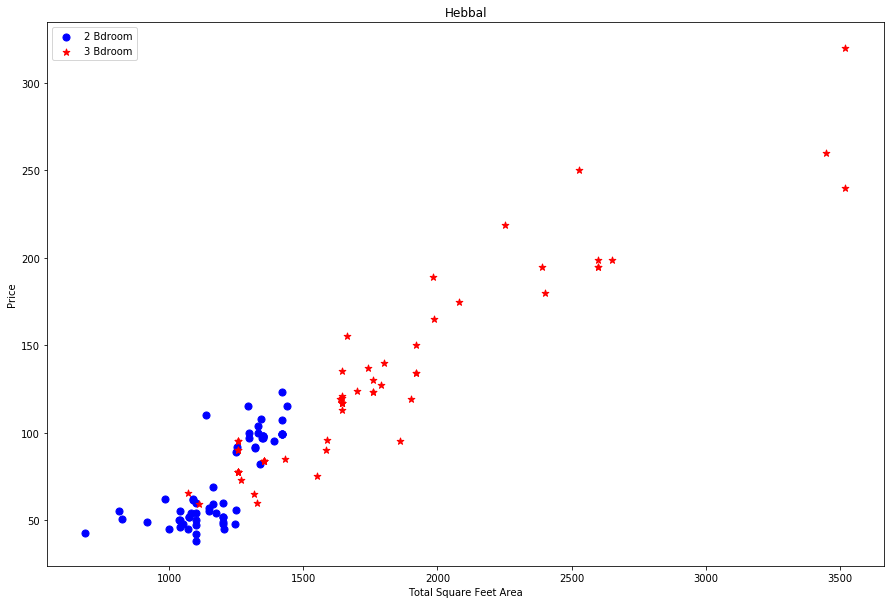

In [41]:
scatter_ploter(df7,'Hebbal')

###### Analysis point
- A good number of 3 bedroom houses has a cheaper price than thier 2 bedroom counerparts
- Deduction: Not realistic
- One possible resolution: get the mean per category, the price of a 3 bedroom house should not come below the mean price of the 2 bedroom house

In [42]:
# the outlier removal equaton
# vid 4 "12:38"
def bedroom_price_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedrom_df in location_df.groupby('Bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedrom_df.price_per_sqft),
                'std': np.std(bedrom_df.price_per_sqft),
                'count': bedrom_df.shape[0]
            }
        for bedroom, bedrom_df in location_df.groupby('Bedroom'):
            stats = bedroom_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedrom_df[bedrom_df.price_per_sqft<(stats['mean'])].index.values ) 
    return df.drop(exclude_indices, axis = 'index')
    

In [43]:
# df8 by applying the above equation to df7
df8 = bedroom_price_outlier_remover(df7)
df8.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [44]:
df8.shape

(8041, 7)

In [45]:
scatter_ploter(df,'Hebbal')

NameError: name 'df' is not defined

###### Analysis point
- A good number of the ouliers have been removed

In [ ]:
#histogram analysis
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


###### Analysis point
- The above indicates a mormal distributon

#### d) another domain knowledge application
- lets analyse the number of bedrooms vs number of bathrooms

In [ ]:
df8[(df8.bath-2) > df8.Bedroom].head()
# The logic: Even with two batroooms less, theno. of bathrooms is still greater than that of bedrooms

###### Analysis point
- usually/normally, caanno have 2 or more bathrooms more than the number of bedrooms

In [ ]:
# removing the excess bathroom outliers
df9 = df8[-((df8.bath-2) > df8.Bedroom)]
df9.head()

In [ ]:
df9.shape

- At this point, our data is mostly clean and some columns that were usfull during the cleaning process and wont be i  the developement of the machine learning module can now be dropped
- For our case, these will be the "size" and "the price_per_sqft" columns

In [ ]:
df10 = df9.drop(['size','price_per_sqft'], axis = 'columns')
df10.head()

## BUILDING THE MACHINE LEARNING MODEL

#### a) In machine learning, we  only work with numbers
 - one tecnique applicatble to this project is *One Hot Encoding(OHE)* 
 - Ensure the techbique you are using for your project is appropriate else the model with have in accuracies

In [ ]:
#convert the location column to zeros and ones using the pandas dummies method
dummies = pd.get_dummies(df10.location)
dummies.head()

In [ ]:
df11 = pd.concat([df10,dummies.drop('other', axis = 'columns')], axis = 'columns')
# In One Hot Encoding,the first or ladst column of the dummmies df may be dropped ()
# More at "kiwidamien.github.io/are-you-getting-burend-by-one-hot-encoding.html"
df11.head(3)

#### b) Drop the non numerical columns

In [ ]:
df12 = df11.drop("location", axis = 'columns')
df12.head(3)

#### c) Create a df with only indepppendent variables by dropping the dependent variable

In [ ]:
x = df12.drop("price",axis = "columns")
x.head(3)

#### d) Create a df with only the dependent variable

In [ ]:
y = df12.price
y.head(3)

#### e) Divide the dataset into training and test datasets
- Training dataset for traing the module
- Test dataset for evaluating the module performance


In [ ]:
#using the the train_test_split method in sklearn
from sklearn.model_selection import train_test_split
#let train set be 80%
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

#### f) Training, testing and evaluating module
- "clf" is a common convention for classifier

i) **Individual models**

In [ ]:
#linear_regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() #creating the model
lr_clf.fit(x_train,y_train) #training the model
lr_clf.score(x_test,y_test) #evaluating the score of the model

- 81 % is a descent score

In [ ]:
# cross validation evaluation
#Big topic, get a separate tutorial on in
# Here we can generate and access multiple scores for the same algorithm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),x,y, cv = cv)

ii) **Multiple models**
- As a data scientist you want to try, you want to try different models and determine the one with the best performing
- Here we deploy method(API) called GridSearchCv 
- Runs ur model on different regressors, parameters and tells you the best performing one togther with the best parameters(hyper parameter tuning) for it
- consider a separate tutorial

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# the GridSearchCV function
def find_best_model_using_gridsearchcnv(x,y):
    algos = {
        "linear_regression" :{
            "model" : LinearRegression(),
            "params" : {
                "normalize": [True, False]
            }
        },
        "lasso":{
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection": ['random','cyclic']
            }
        },
        "decision_tree" :{
            "model" : DecisionTreeRegressor(),
            "params" : {
                "criterion" : ['mse','friendman_mse'],
                "splitter": ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'models': algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores, columns =['models',"best_score","best_params"])

In [ ]:
find_best_model_using_gridsearchcnv(x,y)

- LinearRegression is our best performer

## Lets use the model to make a price predicton
- our trained and tested model is "lr_clf"
- it now has the knowlege to predict our requred dependent variabl (price)
- we have to feed it will all the independent varaibles for the required prediction in thier correct order

In [ ]:
# our indeprndent variable datafram
x.columns.

In [ ]:
len(x.columns)

In [ ]:
# predicting function
def predict_price(sqft,bath,bedroom,location):#this are our inputs
    #first we creatw an arry initally filled with zeros with the lenght of the independent variables
    np_array = np.zeros(len(x.columns))
    #since we used One Hot Encoding, we can use the location attribute index to assing a 1 to the to the array position corresponding to the given location
    location_index = np.where(x.columns == location)[0][0] # returns index of x.columns where its values == the given location argument
    np_array[0] = sqft #place sqft in the 1st position of the array
    np_array[1] = bath #place sqft in the 2nd position of the array
    np_array[2] = bedroom #place sqft in the 3rd position of the array
    
    if location_index >= 0:
        np_array[location_index] =1
    return lr_clf.predict([np_array])[0]


In [ ]:
predict_price(1000,2,2,'Vittasandra')

In [ ]:
predict_price(3000,1,2,'Vittasandra')

In [ ]:
predict_price(3000,1,2,' Devarachikkanahalli')

## Exporting the model for use
- we use the python pickle module for this
- The pickle module serialises python objects so that they can be saved to a file and loaded in a program again later #datacamp

In [ ]:
#using the pickle module
import pickle
with open("banglore_home_prices_model.pickle",'wb') as f:
    #the "wb" file format opens a file only for writing to, in binary format  
    pickle.dump(lr_clf,f) #exports the file
    

 **NOTE**
 - The exported module is small in size because it stores coefficients, intercepts, parameters and not actual data
 - we also need the column information

In [ ]:
#Exporting column information in a .json file
import json
# create a dictionary in which all the x.columns attributes are converted to lowercase 
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
#exporting the dictionary item to the a .json file
with open("real_estate_columns.json", "w") as f:
    f.write(json.dumps(columns))

In [ ]:
columns